## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

## Explore and clean data

In [2]:
dataset = pd.read_csv('../data/dataset_SCL.csv')     
dataset

C:\Users\diego\AppData\Local\Temp\ipykernel_3356\1504723835.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('../data/dataset_SCL.csv')


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


We can see that in 'Vlo-I' and 'Vlo-O' have mixed data and the dataset only have one nan value in 'Vlo-O' so we can drop this row

In [4]:
dataset = dataset.dropna(axis=0).reset_index(drop=True)

Let fix the mixed types data in 'Vlo-I' and 'Vlo-O', there are some int/float and string. Some values are the same number but saved as a string from an int and float. Ex: '400' and '400.0'

In [5]:
def str_float_int(x):
    # Try to convert float string into string if data is like "400.0"
    if type(x) == str:
        try:
            x_new = float(x)
        except:
            x_new = x
    else:
        x_new = x 
    # Float -> int -> str
    if isinstance(x_new,float):
        return str(int(x_new))
    # int -> str
    else:
        return str(x_new)

dataset['Vlo-I'] = dataset.apply(lambda x: str_float_int(x['Vlo-I']),axis=1) 
dataset['Vlo-O'] = dataset.apply(lambda x: str_float_int(x['Vlo-O']),axis=1) 

Now we can check if the schedule flight number is the same as the flight operation number

In [6]:
dataset[dataset['Vlo-I'] != dataset['Vlo-O']] 

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6018,2017-01-05 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-05 09:36:00,1001,SCEL,SAEZ,LAN,5,1,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires
6020,2017-01-07 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-07 06:59:00,1001,SCEL,SAEZ,LAN,7,1,2017,Sabado,I,Grupo LATAM,Santiago,Buenos Aires
6022,2017-01-12 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-12 08:05:00,1003,SCEL,SAEZ,LAN,12,1,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires
6023,2017-01-13 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-13 07:06:00,1001,SCEL,SAEZ,LAN,13,1,2017,Viernes,I,Grupo LATAM,Santiago,Buenos Aires
6025,2017-01-19 10:50:00,4501,SCEL,SAEZ,LAN,2017-01-19 10:56:00,1001,SCEL,SAEZ,LAN,19,1,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60564,2017-11-05 22:10:00,530,SCEL,SPJC,LAN,2017-11-05 22:24:00,534,SCEL,SPJC,LAN,5,11,2017,Domingo,I,Grupo LATAM,Santiago,Lima
61353,2017-11-09 11:20:00,7811,SCEL,SAEZ,LAN,2017-11-09 12:23:00,1103,SCEL,SAEZ,LAN,9,11,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires
61425,2017-11-05 16:30:00,207,SCEL,SCIE,LXP,2017-11-05 18:22:00,207R,SCEL,SCIE,LXP,5,11,2017,Domingo,N,Grupo LATAM,Santiago,Concepcion
62174,2017-12-20 19:25:00,2287,SCEL,SAEZ,ARG,2017-12-20 20:17:00,1287,SCEL,SAEZ,AUT,20,12,2017,Miercoles,I,Aerolineas Argentinas,Santiago,Buenos Aires


We can noticed that only 119 rows are not the same, let check the same with the origin city code

In [7]:
dataset[dataset['Ori-I'] != dataset['Ori-O']] 

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES


There is not problem, lets do the same with Destination and Airline

In [8]:
dataset[dataset['Des-I'] != dataset['Des-O']] 

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
1397,2017-01-17 19:20:00,25,SCEL,SCTE,SKU,2017-01-17 19:46:00,25,SCEL,SCQP,SKU,17,1,2017,Martes,N,Sky Airline,Santiago,Temuco
7289,2017-02-15 06:25:00,11,SCEL,SCTE,SKU,2017-02-15 06:25:00,11,SCEL,SCQP,SKU,15,2,2017,Miercoles,N,Sky Airline,Santiago,Temuco
7519,2017-02-27 06:40:00,71,SCEL,SCIE,SKU,2017-02-27 09:07:00,71,SCEL,SCQP,SKU,27,2,2017,Lunes,N,Sky Airline,Santiago,Temuco
8455,2017-02-15 06:10:00,57,SCEL,SCTE,LAN,2017-02-15 06:12:00,57,SCEL,SCQP,LAN,15,2,2017,Miercoles,N,Grupo LATAM,Santiago,Temuco
12786,2017-03-18 06:25:00,11,SCEL,SCTE,SKU,2017-03-18 06:29:00,11,SCEL,SCQP,SKU,18,3,2017,Sabado,N,Sky Airline,Santiago,Temuco
12822,2017-03-22 12:50:00,17,SCEL,SCBA,SKU,2017-03-22 12:48:00,17,SCEL,SCTE,SKU,22,3,2017,Miercoles,N,Sky Airline,Santiago,Puerto Montt
16168,2017-03-13 23:20:00,532,SCEL,KJFK,LAN,2017-03-14 01:35:00,1346,SCEL,KMIA,LAN,14,3,2017,Martes,I,Grupo LATAM,Santiago,Miami
16936,2017-03-22 17:00:00,1446,SCEL,SEGU,LAN,2017-03-22 17:11:00,1361,SCEL,SABE,LAN,22,3,2017,Miercoles,I,Grupo LATAM,Santiago,Buenos Aires
18292,2017-04-14 18:40:00,25,SCEL,SCTE,SKU,2017-04-14 18:48:00,25,SCEL,SCQP,SKU,14,4,2017,Viernes,N,Sky Airline,Santiago,Temuco
20443,2017-04-14 22:00:00,289,SCEL,SCTE,LAN,2017-04-14 22:01:00,289,SCEL,SCCI,LXP,14,4,2017,Viernes,N,Grupo LATAM,Santiago,Punta Arenas


Where only 28 rows are not the same, let check the airline

In [9]:
dataset[dataset['Emp-I'] != dataset['Emp-O']] 

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
345,2017-01-21 22:30:00,2291,SCEL,SABE,AUT,2017-01-21 22:28:00,2291,SCEL,SABE,ARG,21,1,2017,Sabado,I,Austral,Santiago,Buenos Aires
814,2017-01-01 07:14:00,624,SCEL,SPJC,AVA,2017-01-01 07:11:00,624,SCEL,SPJC,LRC,1,1,2017,Domingo,I,Avianca,Santiago,Lima
815,2017-01-02 07:00:00,624,SCEL,SPJC,AVA,2017-01-02 07:05:00,624,SCEL,SPJC,LRC,2,1,2017,Lunes,I,Avianca,Santiago,Lima
816,2017-01-03 07:14:00,624,SCEL,SPJC,AVA,2017-01-03 07:14:00,624,SCEL,SPJC,LRC,3,1,2017,Martes,I,Avianca,Santiago,Lima
817,2017-01-04 07:00:00,624,SCEL,SPJC,AVA,2017-01-04 07:24:00,624,SCEL,SPJC,LRC,4,1,2017,Miercoles,I,Avianca,Santiago,Lima
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67876,2017-12-26 16:30:00,1033,SCEL,SCIE,LAW,2017-12-26 16:34:00,1033,SCEL,SCIE,JMR,26,12,2017,Martes,N,Latin American Wings,Santiago,Concepcion
67877,2017-12-27 16:30:00,1033,SCEL,SCIE,LAW,2017-12-27 16:30:00,1033,SCEL,SCIE,JMR,27,12,2017,Miercoles,N,Latin American Wings,Santiago,Concepcion
67878,2017-12-28 16:30:00,1033,SCEL,SCIE,LAW,2017-12-28 16:29:00,1033,SCEL,SCIE,JMR,28,12,2017,Jueves,N,Latin American Wings,Santiago,Concepcion
67879,2017-12-29 16:30:00,1033,SCEL,SCIE,LAW,2017-12-29 16:49:00,1033,SCEL,SCIE,JMR,29,12,2017,Viernes,N,Latin American Wings,Santiago,Concepcion


Here are more significally numbers of row, maybe we will use in a future

In [10]:
dataset[(dataset['Vlo-I'] != dataset['Vlo-O']) | (dataset['Ori-I'] != dataset['Ori-O']) | (dataset['Des-I'] != dataset['Des-O']) ] 

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
1397,2017-01-17 19:20:00,25,SCEL,SCTE,SKU,2017-01-17 19:46:00,25,SCEL,SCQP,SKU,17,1,2017,Martes,N,Sky Airline,Santiago,Temuco
6018,2017-01-05 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-05 09:36:00,1001,SCEL,SAEZ,LAN,5,1,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires
6020,2017-01-07 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-07 06:59:00,1001,SCEL,SAEZ,LAN,7,1,2017,Sabado,I,Grupo LATAM,Santiago,Buenos Aires
6022,2017-01-12 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-12 08:05:00,1003,SCEL,SAEZ,LAN,12,1,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires
6023,2017-01-13 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-13 07:06:00,1001,SCEL,SAEZ,LAN,13,1,2017,Viernes,I,Grupo LATAM,Santiago,Buenos Aires
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67598,2017-12-01 11:20:00,7811,SCEL,SAEZ,LAN,2017-12-01 11:22:00,7811,SCEL,SABE,DSM,1,12,2017,Viernes,I,Grupo LATAM,Santiago,Buenos Aires
67599,2017-12-02 11:15:00,7811,SCEL,SAEZ,LAN,2017-12-02 11:21:00,7811,SCEL,SABE,DSM,2,12,2017,Sabado,I,Grupo LATAM,Santiago,Buenos Aires
67600,2017-12-03 11:20:00,7811,SCEL,SAEZ,LAN,2017-12-03 11:30:00,7811,SCEL,SABE,DSM,3,12,2017,Domingo,I,Grupo LATAM,Santiago,Buenos Aires
67696,2017-12-16 02:45:00,1261,SCEL,SARI,LAN,2017-12-16 02:43:00,1261,SCEL,SBFI,LAN,16,12,2017,Sabado,I,Grupo LATAM,Santiago,Cataratas Iguacu


So, we could study more in details why the discrepancy between Vlo, Ori and Des are present, but there are only few values (less than 1%) so for simplicity we just drop it

In [11]:
dataset = dataset[(dataset['Vlo-I'] == dataset['Vlo-O']) & (dataset['Ori-I'] == dataset['Ori-O']) & (dataset['Des-I'] == dataset['Des-O']) ].reset_index(drop=True) 

Now let check if the rest of the data is consistent

In [12]:
print('DIA: ',np.sort(dataset['DIA'].unique()) ) 
print('MES: ',np.sort(dataset['MES'].unique()) ) 
print('AÑO: ',np.sort(dataset['AÑO'].unique()) ) 
print('DIANOM: ',np.sort(dataset['DIANOM'].unique()) ) 
print('TIPOVUELO: ',np.sort(dataset['TIPOVUELO'].unique()) ) 
print('OPERA: ',np.sort(dataset['OPERA'].unique()) ) 
print('SIGLAORI: ',np.sort(dataset['SIGLAORI'].unique()) ) 
print('SIGLADES: ',np.sort(dataset['SIGLADES'].unique()) ) 

DIA:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
MES:  [ 1  2  3  4  5  6  7  8  9 10 11 12]
AÑO:  [2017 2018]
DIANOM:  ['Domingo' 'Jueves' 'Lunes' 'Martes' 'Miercoles' 'Sabado' 'Viernes']
TIPOVUELO:  ['I' 'N']
OPERA:  ['Aerolineas Argentinas' 'Aeromexico' 'Air Canada' 'Air France' 'Alitalia'
 'American Airlines' 'Austral' 'Avianca' 'British Airways' 'Copa Air'
 'Delta Air' 'Gol Trans' 'Grupo LATAM' 'Iberia' 'JetSmart SPA' 'K.L.M.'
 'Lacsa' 'Latin American Wings' 'Oceanair Linhas Aereas'
 'Plus Ultra Lineas Aereas' 'Qantas Airways' 'Sky Airline'
 'United Airlines']
SIGLAORI:  ['Santiago']
SIGLADES:  ['Antofagasta' 'Arica' 'Asuncion' 'Atlanta' 'Auckland N.Z.' 'Balmaceda'
 'Bariloche' 'Bogota' 'Buenos Aires' 'Calama' 'Cancun' 'Castro (Chiloe)'
 'Cataratas Iguacu' 'Ciudad de Mexico' 'Ciudad de Panama' 'Cochabamba'
 'Concepcion' 'Copiapo' 'Cordoba' 'Curitiba, Bra.' 'Dallas'
 'Florianapolis' 'Guayaquil' 'Houston' 'Iquique' 'Isla de Pascua

Days go from 1 to 31, month from 1 to 12, year just 2017 and 2018, type of flight nacional and international, all the flight comes from Santiago and different airlines and destionations. So, there is no problem, we just need to convert into datetime the dates

In [13]:
dataset['Fecha-I'] = pd.to_datetime(dataset['Fecha-I'])
dataset['Fecha-O'] = pd.to_datetime(dataset['Fecha-O'])

Now we can save the clean data

In [14]:
dataset.to_csv('../data/dataset_SCL_clean.csv',index=False) 

So, lets analyze and answer some questions:

    How is the data distributed? Did you find any noteworthy insight to share? What can you conclude about this?
    
- We could noticed that some values do not agree between what was programmed and what was operated, that could be for many reasons but because I am not familiar with the subject I could not distinguish what could be the reason and I did not go deeper because it was only some values that we could discard.

- We can also noticed that all the destinations come from Santiago and there is no discrepancy between Ori-I and Ori-O, so this data does not give us new information.

- We could explore more the data, so lets check some graphs

- DIA

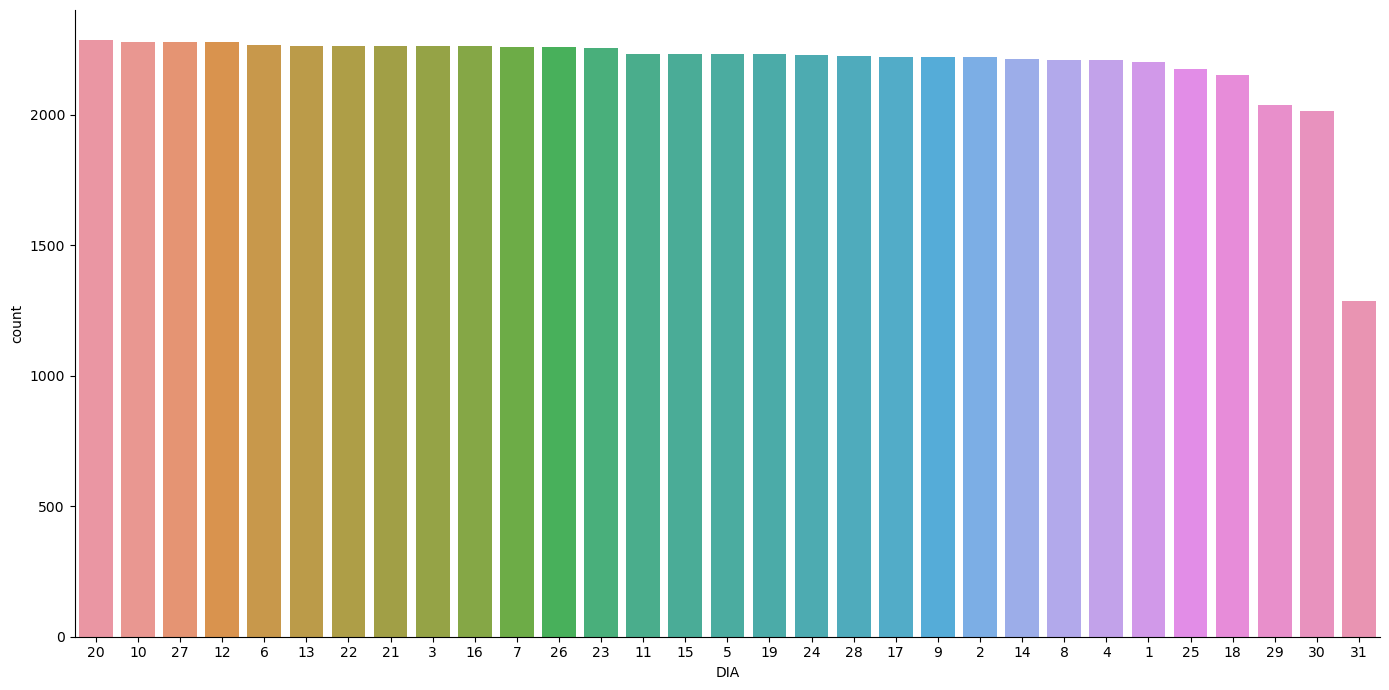

In [15]:
ax = sns.catplot(x='DIA', kind='count', data=dataset, height=7, aspect=2, order=dataset['DIA'].value_counts().index)

- MES

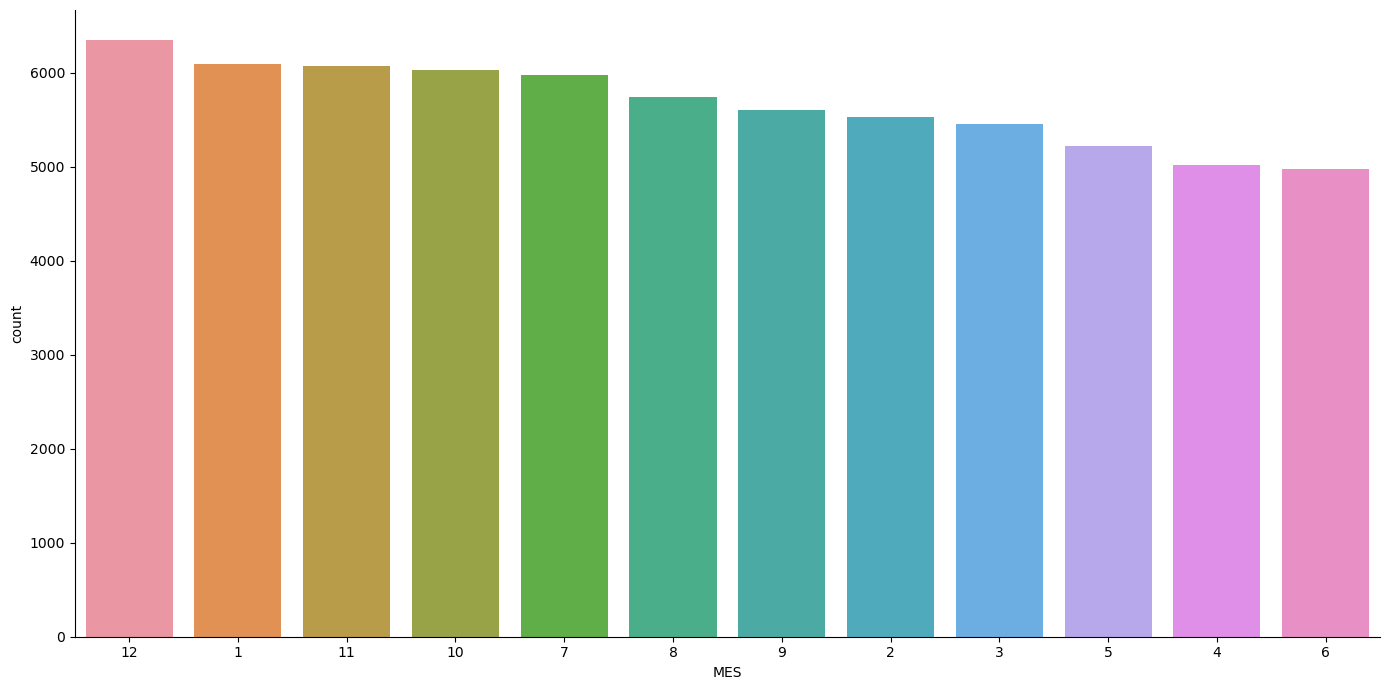

In [16]:
ax = sns.catplot(x='MES', kind='count', data=dataset, height=7, aspect=2, order=dataset['MES'].value_counts().index)

- AÑO

In [17]:
data_y = dataset[['AÑO']].groupby(dataset['AÑO']).agg({'count'})['AÑO']
data_y

,count
AÑO,
2017,68063
2018,2


- DIANOM

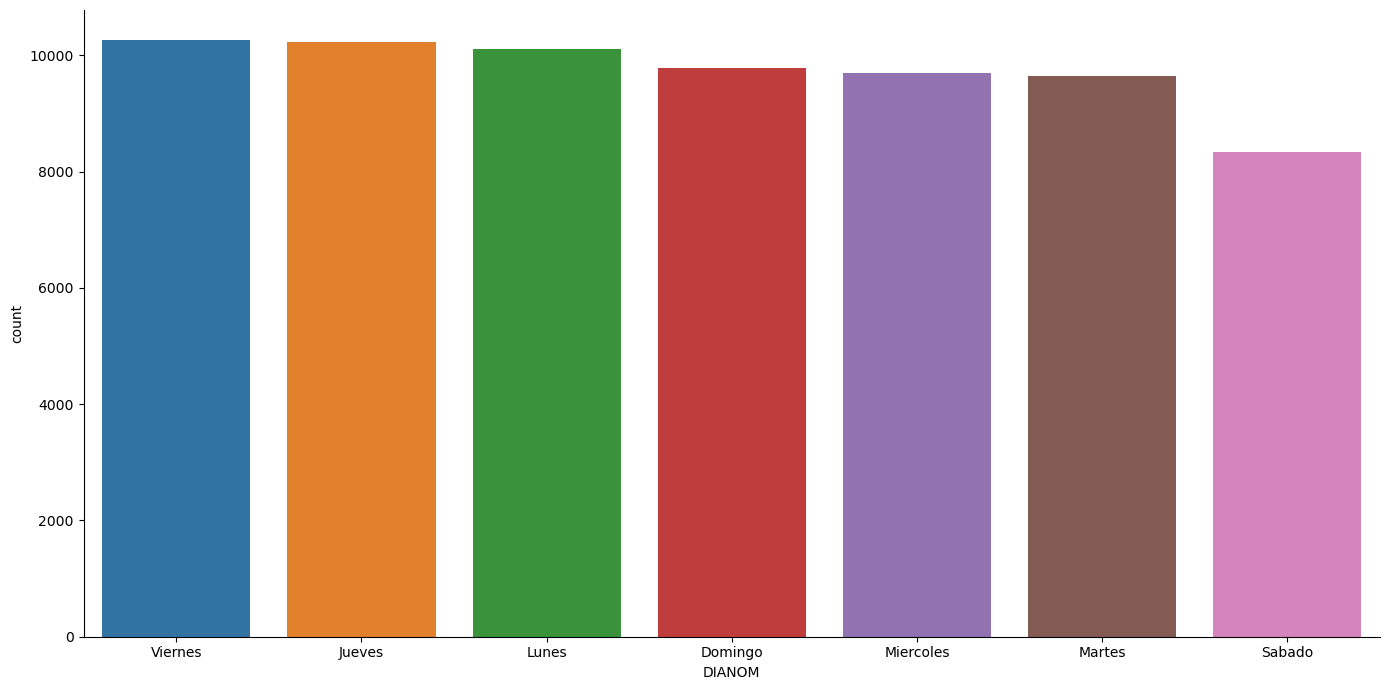

In [18]:
ax = sns.catplot(x='DIANOM', kind='count', data=dataset, height=7, aspect=2, order=dataset['DIANOM'].value_counts().index)

- OPERA

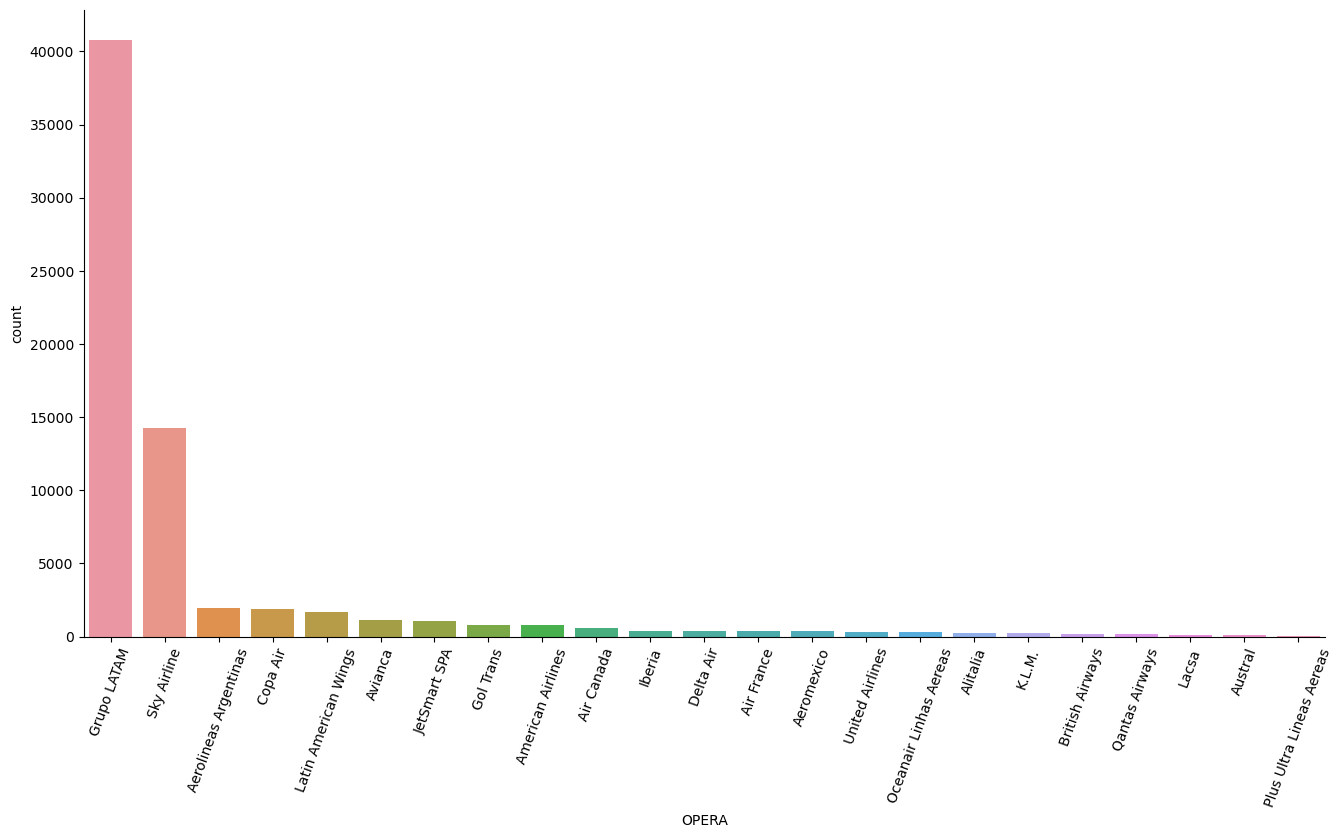

In [19]:
ax = sns.catplot(x='OPERA', kind='count', data=dataset, height=7, aspect=2, order=dataset['OPERA'].value_counts().index)
_ = ax.set_xticklabels(rotation=70)

- SIGLADES

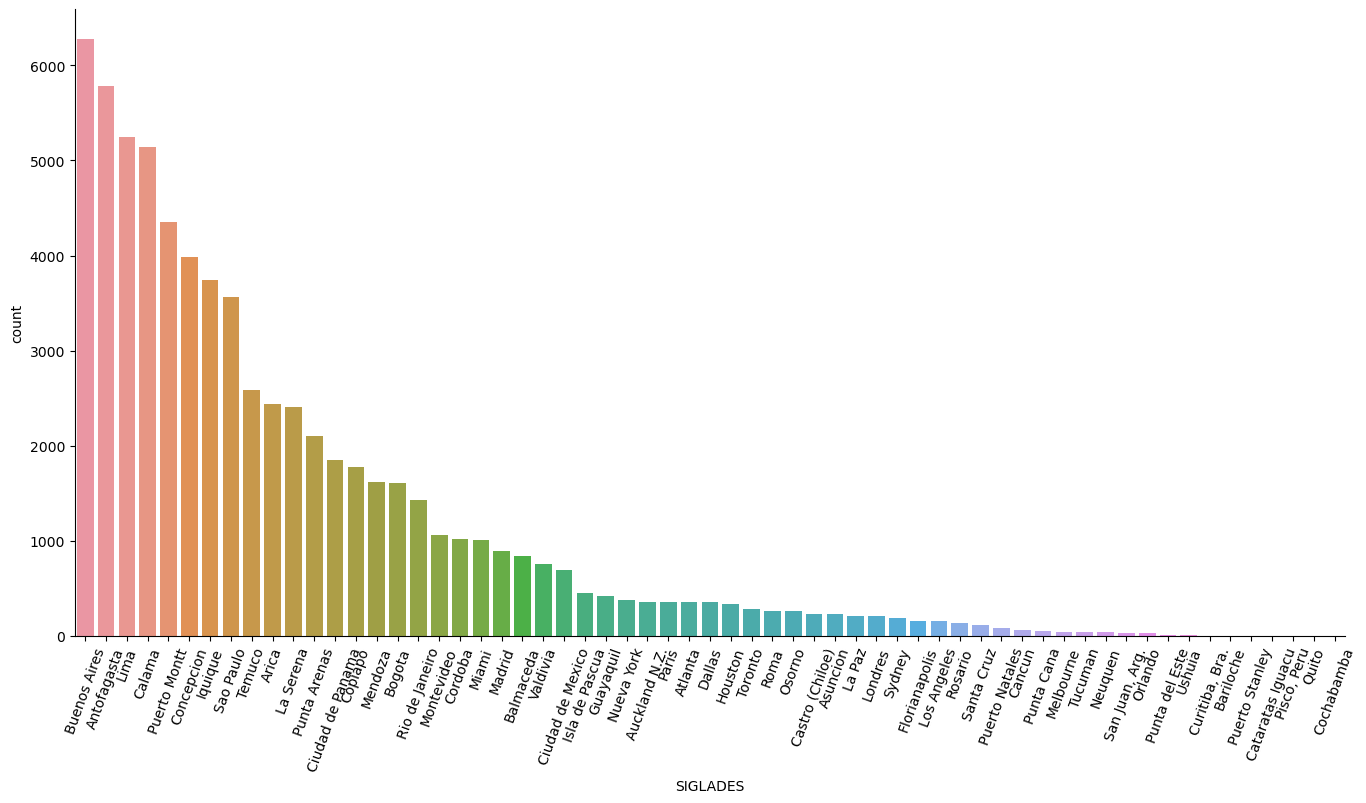

In [20]:
ax = sns.catplot(x='SIGLADES', kind='count', data=dataset, height=7, aspect=2, order=dataset['SIGLADES'].value_counts().index)
_ = ax.set_xticklabels(rotation=70)

- The most popular flight day are the 20s and the least popular is at the end of the mounth. 
- As expected, the months with the highest number of flights are December and January (Holidays). 
- There are only 2 registered flights in 2018
- The most popular flight day are friday and thursday.
- The main airlines are latam and sky in this dataset.
- The largest number of flights from Santiago de Chile are to Buenos Aires, Antofagasta, Lima in the first places and the next majority to cities in Chile.

# Synthetic features

- high_season

In [21]:
# Get Month and day
dataset['MM_DD-I'] = dataset['Fecha-I'].dt.strftime('%m-%d')

# Get high season value
def funct_high_season(x):
    if x >= '12-15' or x <= '03-03':
        return 1
    elif x >= '07-15' and x <= '07-31':
        return 1
    elif x >= '09-11' and x <= '09-30':
        return 1
    else:
        return 0

dataset['high_season'] = dataset.apply(lambda x: funct_high_season(x['MM_DD-I']),axis=1) 

- min_diff

In [22]:
dataset['min_diff'] = (dataset['Fecha-O'] - dataset['Fecha-I']).dt.total_seconds()//60

- delay_15

In [23]:
dataset['delay_15'] = dataset.apply(lambda x: 1 if x['min_diff'] > 15 else 0, axis=1) # if negative doesnt' matter -> start earlier

- period_day

In [24]:
# Get hour and minutes
dataset['HH_MM-I'] = dataset['Fecha-I'].dt.strftime('%H:%M')

# Get period day value
def funct_period_day(x):
    if x >= '05:00' and x < '12:00':
        return 'morning'
    elif x >= '12:00' and x < '19:00':
        return 'afternoon'
    else:
        return 'night'

dataset['period_day'] = dataset.apply(lambda x: funct_period_day(x['HH_MM-I']),axis=1)

In [25]:
dataset = dataset.drop(columns = ['MM_DD-I', 'HH_MM-I'])

Lets see some graphs

In [26]:
dataset

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,high_season,min_diff,delay_15,period_day
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,0,night
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,0,night
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,0,night
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,0,night
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,-3.0,0,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68060,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,46.0,1,afternoon
68061,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400,SCEL,SPJC,JAT,...,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1,16.0,1,afternoon
68062,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400,SCEL,SPJC,JAT,...,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1,40.0,1,afternoon
68063,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,13.0,0,afternoon


- Delay rate across Destination

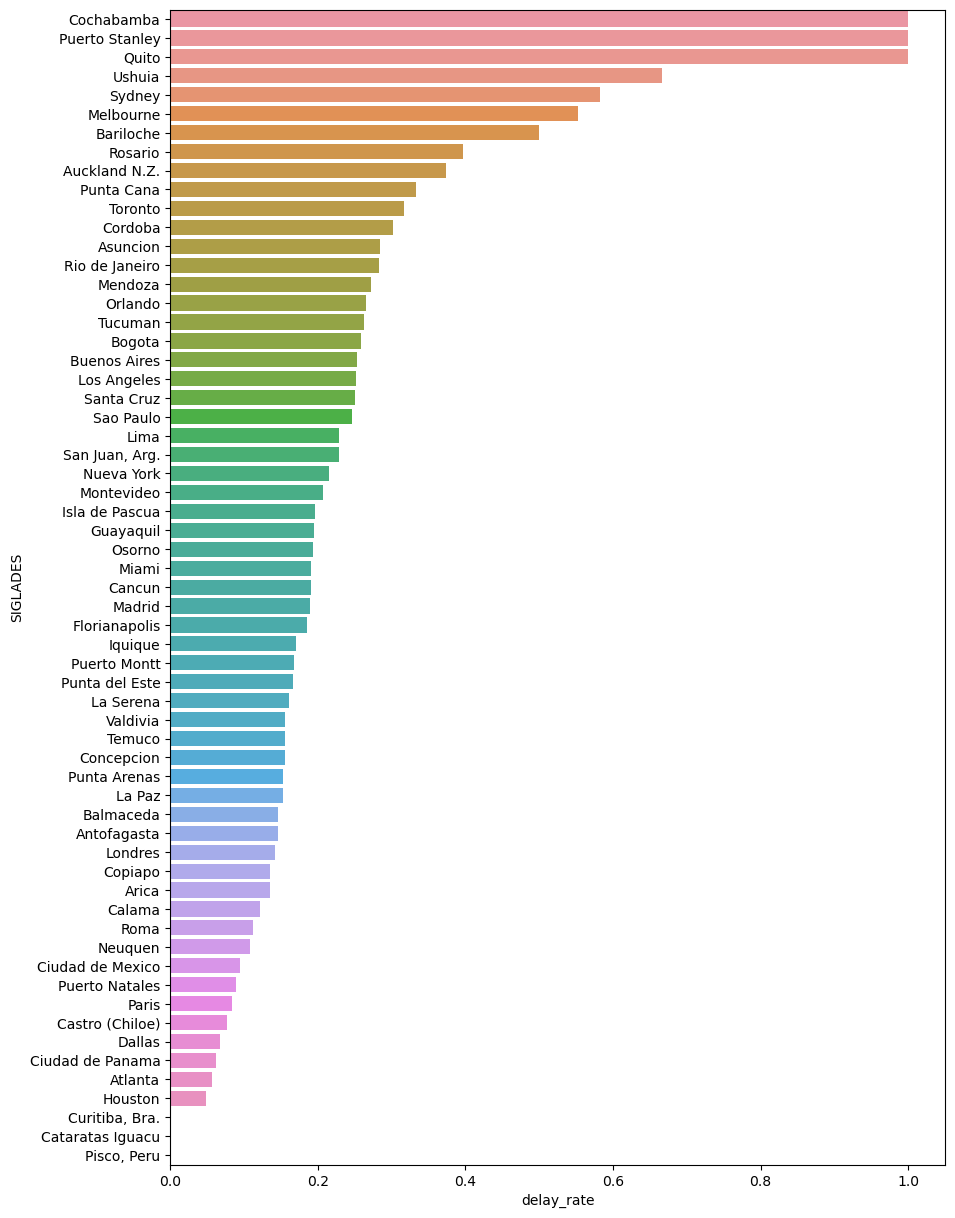

In [27]:
delay_rate = dataset.groupby('SIGLADES')['delay_15'].apply(lambda x: (x==1).sum()/(len(x))).reset_index(name='delay_rate').sort_values(by='delay_rate',ascending=False).reset_index(drop=True)
fig, ax = plt.subplots(figsize=(10, 15))
ax = sns.barplot(x='delay_rate', y='SIGLADES', data=delay_rate, orient='h')

- Delay rate across Airline

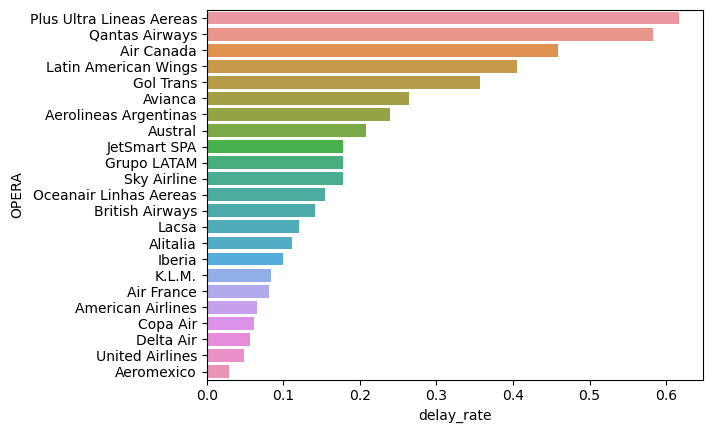

In [28]:
delay_rate = dataset.groupby('OPERA')['delay_15'].apply(lambda x: (x==1).sum()/(len(x))).reset_index(name='delay_rate').sort_values(by='delay_rate',ascending=False).reset_index(drop=True)
ax = sns.barplot(x='delay_rate', y='OPERA', data=delay_rate, orient='h')

- Delay rate across month of the year

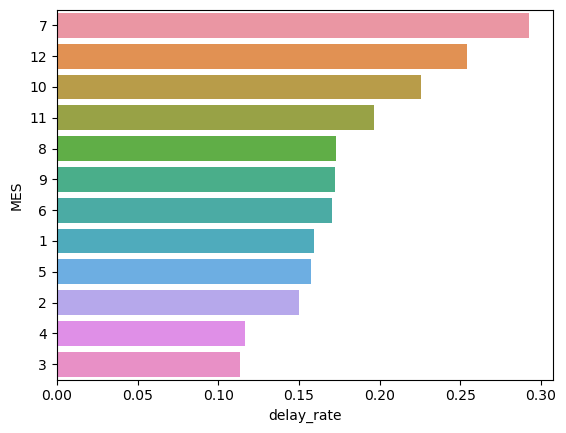

In [29]:
delay_rate = dataset.groupby('MES')['delay_15'].apply(lambda x: (x==1).sum()/(len(x))).reset_index(name='delay_rate').sort_values(by='delay_rate',ascending=False).reset_index(drop=True)
ax = sns.barplot(x='delay_rate', y='MES', data=delay_rate, orient='h',order=delay_rate['MES'])

- Delay rate across Day of the week

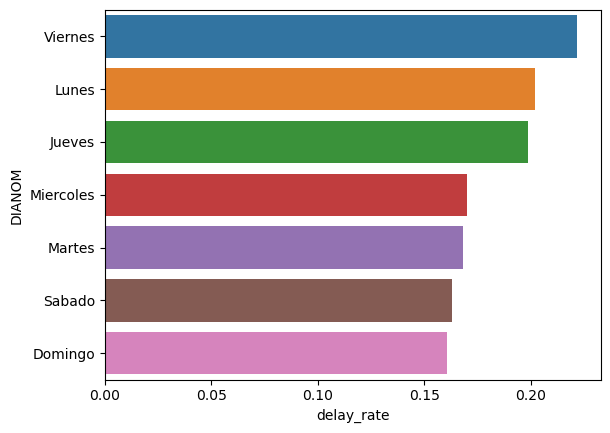

In [30]:
delay_rate = dataset.groupby('DIANOM')['delay_15'].apply(lambda x: (x==1).sum()/(len(x))).reset_index(name='delay_rate').sort_values(by='delay_rate',ascending=False).reset_index(drop=True)
ax = sns.barplot(x='delay_rate', y='DIANOM', data=delay_rate, orient='h')

- Delay rate across Day of the month

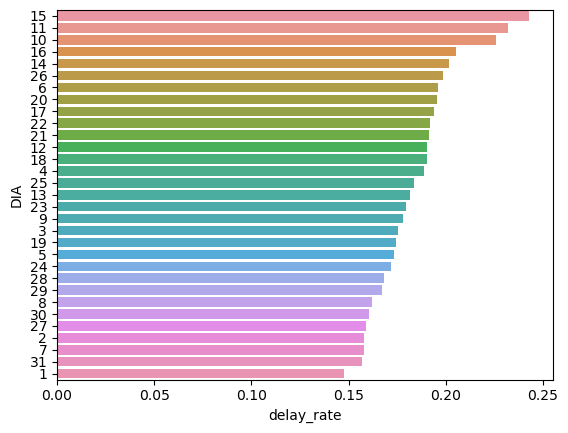

In [31]:
delay_rate = dataset.groupby('DIA')['delay_15'].apply(lambda x: (x==1).sum()/(len(x))).reset_index(name='delay_rate').sort_values(by='delay_rate',ascending=False).reset_index(drop=True)
ax = sns.barplot(x='delay_rate', y='DIA', data=delay_rate, orient='h',order=delay_rate['DIA'])

- Delay rate across season

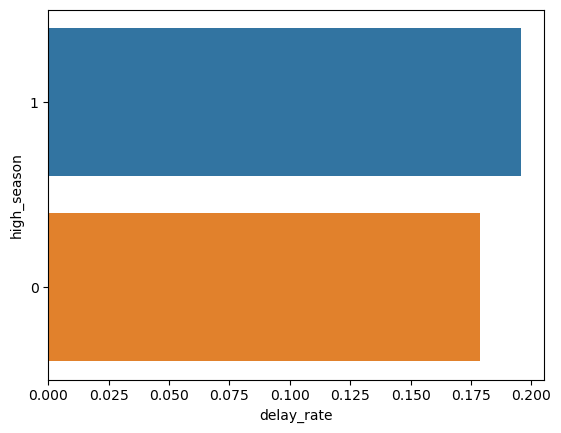

In [32]:
delay_rate = dataset.groupby('high_season')['delay_15'].apply(lambda x: (x==1).sum()/(len(x))).reset_index(name='delay_rate').sort_values(by='delay_rate',ascending=False).reset_index(drop=True)
ax = sns.barplot(x='delay_rate', y='high_season', data=delay_rate, orient='h',order=delay_rate['high_season'])

- Delay rate across type of flight

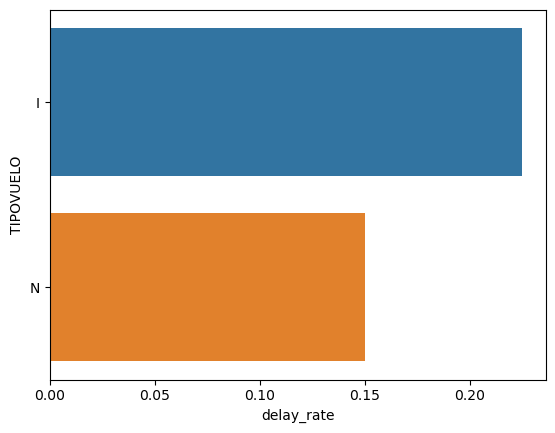

In [33]:
delay_rate = dataset.groupby('TIPOVUELO')['delay_15'].apply(lambda x: (x==1).sum()/(len(x))).reset_index(name='delay_rate').sort_values(by='delay_rate',ascending=False).reset_index(drop=True)
ax = sns.barplot(x='delay_rate', y='TIPOVUELO', data=delay_rate, orient='h')

- Delay rate across period of day

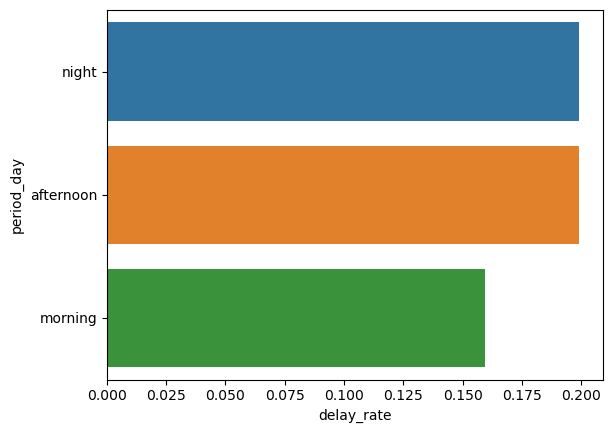

In [34]:
delay_rate = dataset.groupby('period_day')['delay_15'].apply(lambda x: (x==1).sum()/(len(x))).reset_index(name='delay_rate').sort_values(by='delay_rate',ascending=False).reset_index(drop=True)
ax = sns.barplot(x='delay_rate', y='period_day', data=delay_rate, orient='h')

Export new columns

In [35]:
dataset.to_csv('../data/synthetic_features.csv',index=False)

So, now we can answer the following questions:

    What is the behavior of the delay rate across destination, airline, month of the year, day of the week, season, type of flight? What variables would you expect to have the most influence in predicting delays?

- As we can see in the rate of delay at the destination, there are 3 with a 100% probability of delay. Maybe there is only one value per destination.

In [36]:
dataset[(dataset['SIGLADES'] == 'Quito') | (dataset['SIGLADES'] == 'Puerto Stanley') | (dataset['SIGLADES'] == 'Cochabamba') ]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,high_season,min_diff,delay_15,period_day
16990,2017-03-23 01:00:00,1906,SCEL,SEQM,LNE,2017-03-23 01:24:00,1906,SCEL,SEQM,LNE,...,2017,Jueves,I,Grupo LATAM,Santiago,Quito,0,24.0,1,night
61082,2017-11-08 07:45:00,1257,SCEL,EGYP,LAN,2017-11-08 08:35:00,1257,SCEL,EGYP,LAN,...,2017,Miercoles,I,Grupo LATAM,Santiago,Puerto Stanley,0,50.0,1,morning
67553,2017-12-10 00:01:00,1238,SCEL,SLCB,LAN,2017-12-10 01:54:00,1238,SCEL,SLCB,LAN,...,2017,Domingo,I,Grupo LATAM,Santiago,Cochabamba,0,113.0,1,night


- Indeed, for Quito, Puerto Stanley and Cochabamba there is only one data for each one. Omitting these, the ones with the highest probability of delay are international flights, the first national flight with the highest probability of delay is to Easter Island with approximately a 20% probability of delay
- According to the airlines, it is to be expected that some have a better reputation regarding flight delays.
- The month with the most delays is July, this could be due to weather conditions, which could be an interesting variable to consider.
- Friday corresponds to the day with the most delays, which coincides with the day with the most flights.
- There is a little more chance of delay in high season than in low season, which I would have expected a bigger difference.
- As I expected, there are more chances of delays on international flights than on national ones, as mentioned above.

# Prepare Dataset

Lets get some new features from the date

In [37]:
dataset['week'] = dataset['Fecha-I'].dt.isocalendar().week
dataset['quarter'] = dataset['Fecha-I'].dt.quarter 

Define Target and features:
 - delay_15: is our target.
 - Fecha-I, Fecha-O and min_diff allowed us to compute delay_15.
 - Ori-I, Ori-O and SIGLEORI are all the same.
 - Des-I, Des-O match with SIGLADES, so lets just keep this.
 - Emp_I, Emp-O and OPERA don't match at all but let's just consider OPERA.
 - AÑO: It is not necessary, there are only 2 values in 2018.
 - Consider DIA, MES, DIANOM, quarter, week, high_season and period_day as a features related to the date.
 - TIPOVUELO as feature related to the destination (as a SIGLADES).

In [38]:
target = ['delay_15']
features = ['DIA','MES','week','quarter','DIANOM','TIPOVUELO','OPERA','SIGLADES','high_season','period_day']

Dataframe with features

In [39]:
df = dataset[features+target]
x = df[features]
y = df[target].astype(int)
print(y['delay_15'].mean())  

0.18442665099537206


Being a binary variable, if we calculate the average we can see how balanced the data is:

In [40]:
print('Balance: {}'.format(y['delay_15'].mean()))  

Balance: 0.18442665099537206


The problem is naturally unbalanced in the ratio 1:5 approximately, to solve the following alternatives could be considered: undersampling, oversampling and loss functions penalties, but due to time constraints it will not take place on this occasion

We preprocess the categorical variables with a OneHotEncoder, it could be another way. For numeric variables a StandardScaler as first try, it could be nothing.

In [41]:
# Numerical and categorical variables
numerical_features = ['DIA','MES','week','quarter','high_season']
categorical_features = ['DIANOM','TIPOVUELO','OPERA','SIGLADES','period_day']

preprocessor = ColumnTransformer([
	# ("num", StandardScaler(), numerical_features),
	("cat", OneHotEncoder(), categorical_features)
])

x_pp = preprocessor.fit_transform(x) 
name_variables = preprocessor.get_feature_names_out().tolist() 

In [42]:
df_x = pd.DataFrame(data=x_pp.toarray(),columns=name_variables)

## Train Models

First we split intro train and test sets

In [43]:
x_train, x_test, y_train, y_test = train_test_split(df_x, y['delay_15'], test_size=0.2,random_state=42)

In [44]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(54452, 96)
(54452,)
(13613, 96)
(13613,)


Different Metrics:

In [45]:
def compute_metrics(y_true, y_pred):
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "f1_score": f1_score(y_true, y_pred)
    }

Computed metric for models trained on test and train datasets

In [46]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000,random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'RandomForestClassifier' : RandomForestClassifier(random_state=42),
    'LGBMClassifier' :LGBMClassifier(random_state=42)
}

results_test = []
results_train = []
for model_name, model in models.items():
    # Train model
    if model_name == 'LGBMClassifier':
        model.fit(x_train.to_numpy(), y_train)
    else:
        model.fit(x_train, y_train)

    # Compute metrics on training set
    y_train_pred = model.predict(x_train)
    train_metrics= compute_metrics(y_train, y_train_pred) 
    
    # Compute metrics on training set
    y_test_pred = model.predict(x_test)
    test_metrics = compute_metrics(y_test, y_test_pred) 

    # Add model metrics to results
    train_metrics['Model'] = model_name
    results_train.append(train_metrics)

    test_metrics['Model'] = model_name
    results_test.append(test_metrics)

df_metrics_train = pd.DataFrame(results_train).set_index('Model')
df_metrics_test = pd.DataFrame(results_test).set_index('Model')

Plot metrics of different models

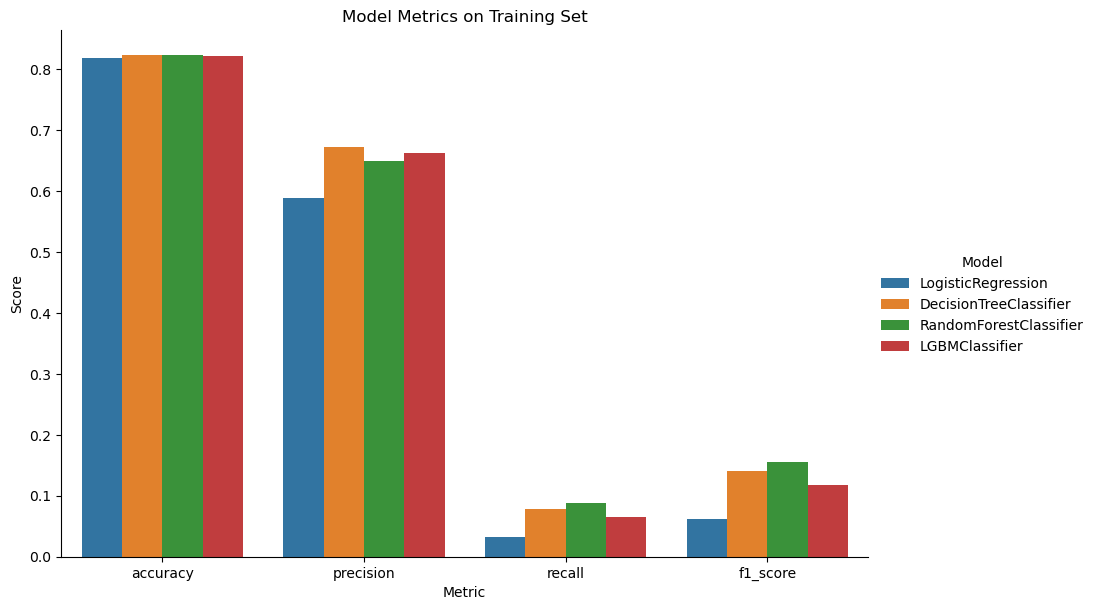

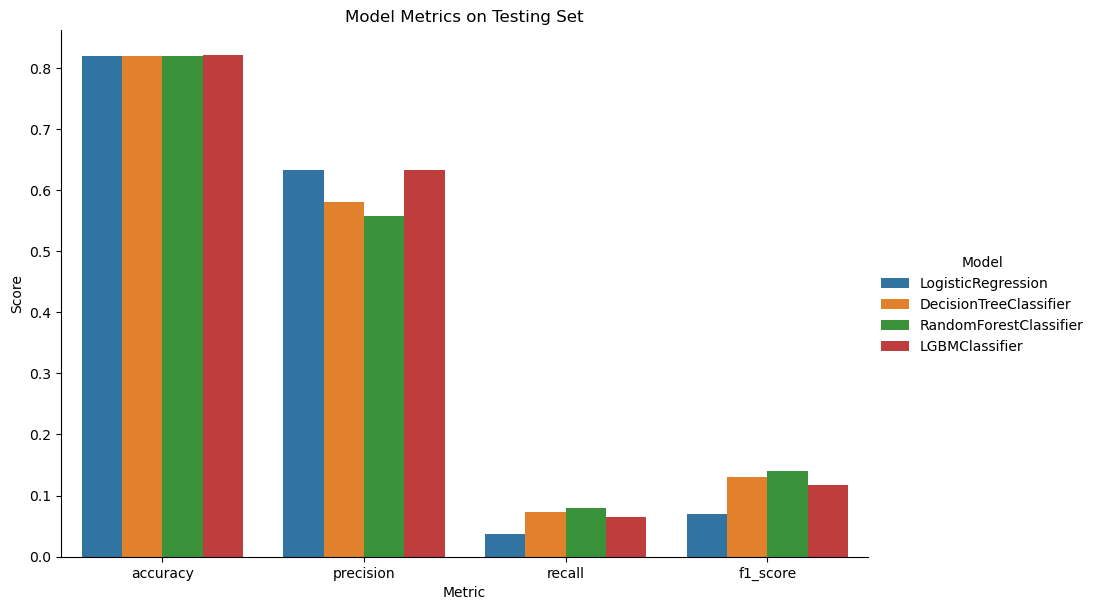

In [47]:
# Reset the index to convert the model names to a column
df_metrics_train = df_metrics_train.reset_index()
df_metrics_test = df_metrics_test.reset_index()

# Melt the dataframe to create a long-form representation
df_metrics_train_melted = pd.melt(df_metrics_train, id_vars=['Model'], var_name='Metric', value_name='Score')
df_metrics_test_melted = pd.melt(df_metrics_test, id_vars=['Model'], var_name='Metric', value_name='Score')

# Create a bar plot with hue=Model and x=Metric
sns.catplot(data=df_metrics_train_melted, kind='bar', x='Metric', y='Score', hue='Model', height=6, aspect=1.5)

# Set the title and axis labels
plt.title('Model Metrics on Training Set')
plt.xlabel('Metric')
plt.ylabel('Score')

# Show the plot
plt.show()


# Create a bar plot with hue=Model and x=Metric
sns.catplot(data=df_metrics_test_melted, kind='bar', x='Metric', y='Score', hue='Model', height=6, aspect=1.5)

# Set the title and axis labels
plt.title('Model Metrics on Testing Set')
plt.xlabel('Metric')
plt.ylabel('Score')

# Show the plot
plt.show()


    Define and justify what metrics you used to assess model performance

- It can be seen that all the models have approximately 80% accuracy for trained and tested set, as well as for the data used for the training and the test, which does not indicate much in this case since, as mentioned, the data is unbalanced in approximately the same reason.
- In terms of precision, both the DecisionTree and the RandomForest are the best performers for the training data, while for the testing data the LGBM performs better. It's low anyway. 
- As for the recall, the same previous pattern is repeated. 
- For the f1_score, which is the combination of these two metrics, the models show low performance for the testing data.

## Feature Importance

Lets see which are the most important parameters for the RandomForestClassifier

In [48]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
rfc_dic = compute_metrics(y_test, y_pred)
print(rfc_dic)
print(confusion_matrix(y_test, y_pred) ) 

{'accuracy': 0.8196576801586719, 'precision': 0.5586592178770949, 'recall': 0.08009611533840609, 'f1_score': 0.14010507880910683}
[[10958   158]
 [ 2297   200]]


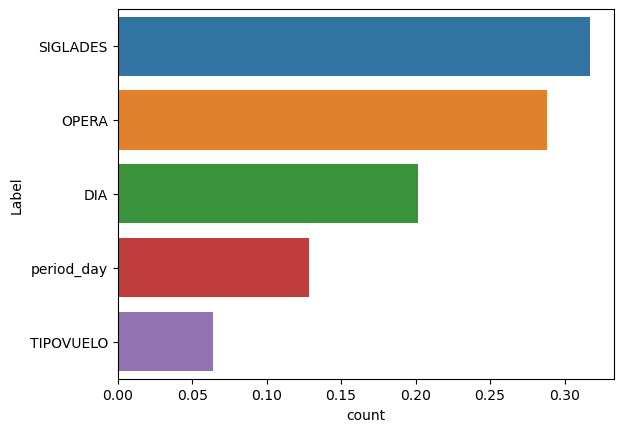

In [49]:
def label(x,features):
    for item in features:
        if item in x:
            return item
        
feature_imp = pd.DataFrame(sorted(zip(rfc.feature_importances_, x_train.columns)), columns=['count', 'feature'])
feature_imp['Label'] = feature_imp.apply(lambda x: label(x['feature'],features),axis=1) 
ax = sns.barplot(x="count", y="Label", data=feature_imp.groupby('Label').agg('sum').reset_index().sort_values(by="count", ascending=False))

    What variables were the most influential in the prediction task?

- In this case we can note that the most relevant features are the country of destination, the day the flight takes place and the week in which it takes place.

    How could you improve the Performance?

- All models perform very poorly, but all this can be solved either by:
    - Calibrating the hyperparameters of the respective models (GridSearch)
    - Solving the data balancing problem doing undersampling, oversampling or loss functions penalties.
    - Consider adding/removing some features. Perhaps to reduce the size of the data a bit, it may be a good option to modify the destination by the continent of each one or the distance from the destination to Santiago. Weather conditions can also be a good parameter as it was mentioned before. Maybe remove some variables related to dates. This is a problem that clearly has a time dependency, it would be interesting to add more years to the study, among other options but due to time constraints, these tasks are not performed.